In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from datetime import datetime
import collections
import csv
import os.path
import json



In [3]:
df_substance2019 = pd.read_csv('../data/kd2019substance.csv', sep=',')
df_kd2018 = pd.read_csv('../data/kd2018.csv', sep=';')
df_kd2019 = pd.read_csv('../data/kd2019.csv', sep=';')
df_kd2020 = pd.read_csv('../data/kd2020.csv', sep=';')
df_kd2021 = pd.read_csv('../data/kd2021.csv', sep=';')
df_substance2019['leto'] = 2019
df_kd2018['leto'] = 2018
df_kd2019 ['leto'] = 2019
df_kd2020 ['leto'] = 2020
df_kd2021 ['leto'] = 2021
df_substance2019 = df_substance2019.drop_duplicates(["ZaporednaStevilkaKD"])
df_kd2018 = df_kd2018.drop_duplicates(["ZaporednaStevilkaKD"])
df_kd2019 = df_kd2019.drop_duplicates(["ZaporednaStevilkaKD"])
df_kd2020 = df_kd2020.drop_duplicates(["ZaporednaStevilkaKD"])
df_kd2021 = df_kd2021.drop_duplicates(["ZaporednaStevilkaKD"])
kd_all = [df_kd2018, df_kd2019, df_kd2020, df_kd2021, df_substance2019]
"�"

'�'

In [4]:
kd_victims_other = []
for i in range(len(kd_all)):
    kd_all[i] = kd_all[i][kd_all[i]['VrstaOsebe'].notna()]
    kd_victims_other.append((kd_all[i][kd_all[i]['VrstaOsebe'].str.contains('RTEV')],
                             kd_all[i][~kd_all[i]['VrstaOsebe'].str.contains('RTEV')]))

In [5]:
#TODO:
#-katere so vrste krminalnih dejanj D
#-koliko je vsakega kdja
#-koliko je vsakega kdja po letih D
#-koliko je vsakega kdja po letih po obcinah
#-koliko je vsakega kdja po letih po regijah
#-koliko je skupaj vsakega kdja po obcinah
#-koliko je skupaj vsakega kdja po regijah
#-najpogostejsi prostori za vsako kd
#-cas od izvedbe kd do obtozitve za kd
#-poskusi kaj z leti, starostni razred, denarna skoda

In [6]:
frequencysKD = []
frequencysdf = []
dejanja = set()
for zrtev, notvictim in kd_victims_other:
    df_temp = notvictim[['ZaporednaStevilkaKD','OpisKD', 'leto', 'UpravnaEnotaStoritve']]
    df_temp[['OpisKD1', 'OpisKD2']] = df_temp['OpisKD'].str.split(' - ', 1, expand=True)
    frequencys = []
    for idx,name in enumerate(df_temp['OpisKD2'].value_counts().index.tolist()):
        frequencys.append([name, df_temp['OpisKD2'].value_counts()[idx]])
    frequencysKD.append(np.array(frequencys))
    frequencysdf.append(pd.DataFrame(np.array(frequencys), columns=['OpisKD2', 'frequency']))
    dejanja = set(dejanje for dejanje in df_temp['OpisKD2'].unique()).union(dejanja)

frequencysdf_concat = frequencysdf[0]
for i in range(len(frequencysdf)-1):
   frequencysdf_concat = frequencysdf_concat.append(frequencysdf[i+1], ignore_index=True)
frequencysdf_group = frequencysdf_concat.groupby(['OpisKD2'])['frequency'].sum()
print(frequencysdf_group)

c:\Users\Irinej\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


OpisKD2
                                                               11
DAJANJE DARIL ZA NEZAKONITO POSREDOVANJE                   422226
DAJANJE PODKUPNINE                                      124318863
DAV�NA ZATAJITEV                                         23428063
DETOMOR                                                       121
                                                          ...    
ZLORABA ZNAMENJ ZA POMO� IN NEVARNOST                    18142516
�ALJIVA OBDOL�ITEV                                       15131311
�IKANIRANJE NA DELOVNEM MESTU                            24472629
��UVANJE IN JAVNO POVELI�EVANJE TERORISTI�NIH DEJANJ            1
��UVANJE K NASILNI SPREMEMBI USTAVNE UREDITVE                   1
Name: frequency, Length: 209, dtype: object


In [7]:
#kdji po letih po obcinah
temp_dfs = []
for zrtev, notvictim in kd_victims_other:
    df_temp2 = notvictim[['ZaporednaStevilkaKD', 'MesecStoritve', 'UraStoritve', 'DanVTednu', 'Povratnik',
                        'OpisKD', 'leto', 'UpravnaEnotaStoritve', 'PUStoritveKD', 'UporabljenoSredstvo1',
                        'UporabljenoSredstvo2', 'UporabljenoSredstvo3', 'UporabljenoSredstvo4']]
    df_temp2[['OpisKD1', 'OpisKD2']] = df_temp2['OpisKD'].str.split(' - ', 1, expand=True)
    temp_dfs.append(df_temp2)




In [8]:
print(temp_dfs[0]['UpravnaEnotaStoritve'].unique())
print("-----------------------------------------------------------------------------")
print(temp_dfs[0]['PUStoritveKD'].unique())

['CELJE' 'KRANJ' 'LJUBLJANA' '�ALEC' 'GROSUPLJE' 'MARIBOR'
 'SLOVENJ GRADEC' 'MOZIRJE' 'LITIJA' 'KOPER' 'NOVA GORICA'
 'RAVNE NA KORO�KEM' 'VELENJE' 'VRHNIKA' '�ENTJUR PRI CELJU' 'SEVNICA'
 'DRAVOGRAD' 'KAMNIK' 'DOM�ALE' 'RADLJE OB DRAVI' '�KOFJA LOKA' 'IZOLA'
 'KR�KO' 'PIRAN' 'SE�ANA' 'GORNJA RADGONA' 'LA�KO' 'AJDOV��INA' 'TRBOVLJE'
 'NOVO MESTO' 'ILIRSKA BISTRICA' 'JESENICE' 'NEZNANA OB�' 'LENDAVA'
 'LJUTOMER' 'TREBNJE' 'PTUJ' '�RNOMELJ' 'RADOVLJICA' 'ORMO�' 'NEZNANA UE'
 'MURSKA SOBOTA' 'RU�E' '�MARJE PRI JEL�AH' 'LOGATEC' 'RIBNICA' 'POSTOJNA'
 'SLOVENSKE KONJICE' 'LENART' 'KO�EVJE' 'BRE�ICE' 'IDRIJA'
 'SLOVENSKA BISTRICA' 'PESNICA' 'ZAGORJE OB SAVI' 'NI PODATKA' 'TOLMIN'
 'TR�I�' 'HRASTNIK' 'METLIKA' 'CERKNICA']
-----------------------------------------------------------------------------
['PU CELJE' 'PU KRANJ' 'PU LJUBLJANA' 'PU MARIBOR' 'PU KOPER'
 'PU NOVA GORICA' 'PU NOVO MESTO' 'PU MURSKA SOBOTA' 'GPU' 'NI PODATKA']


In [9]:
obcine = {}
policijskeUprave = {}
years = []
for year in temp_dfs:
    obcine = {obcina : pd.DataFrame for obcina in year['UpravnaEnotaStoritve'].unique()}
    policijskeUprave = {policijskaUprava : pd.DataFrame for policijskaUprava in year['PUStoritveKD'].unique()}
    years.append((obcine, policijskeUprave))

count = 0
for obcineOfYear, policijskeUpraveOfYear in years:
    wholeYear = temp_dfs[count]
    for obcina in obcineOfYear:
        obcineOfYear[obcina] = wholeYear[wholeYear['UpravnaEnotaStoritve'] == obcina]
    for policijskaUprava in policijskeUpraveOfYear:
        policijskeUpraveOfYear[policijskaUprava] = wholeYear[wholeYear['PUStoritveKD'] == policijskaUprava]
    count += 1

In [10]:

print(years[0][0]['CELJE']['OpisKD2'].value_counts().index.tolist()[0])
print(years[0][0]['CELJE']['OpisKD2'].value_counts())

NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD
NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD    126
KR�ITEV TEMELJNIH PRAVIC DELAVCEV                                                                        64
TATVINA                                                                                                  46
NASILJE V DRU�INI                                                                                        41
LAHKA TELESNA PO�KODBA                                                                                   35
                                                                                                       ... 
SPREJEMANJE KORISTI ZA NEZAKONITO POSREDOVANJE                                                            1
PROTIPRAVEN ODVZEM PROSTOSTI                                                                              1
ZLORABA ZNAMENJ ZA POMO� IN NEVARNO

In [11]:
with open('../data/kazni_dict.json', 'r', encoding='utf8') as kazni:
    kazni_dict = json.load(kazni)

kazni_dict_brezsumnikov = {}
for dejanje in kazni_dict:
    dejanje1 = dejanje.replace('ž', 'z')
    dejanje1 = dejanje1.replace('č', 'c')
    dejanje1 = dejanje1.replace('š', 's')
    kazni_dict_brezsumnikov[dejanje1] = kazni_dict[dejanje]

kds = []
for kd in kazni_dict_brezsumnikov:
    kds.append(kd)

In [12]:
from itertools import product
def getCombinations(number):
    lst = ['c', 's', 'z']
    return [''.join(x) for x in product(lst, repeat = number)]



def getSentanceOptions(options, initialSentance):
    sentances = []
    for wordOptions, index in options:
        for option in wordOptions:
            initialSentancex = initialSentance
            initialSentancex[index] = option
            sentances.append(' '.join(initialSentancex))
    return sentances



def findMatch(inputSentance, criminalDeads):
    i = 0
    options = []
    for word in inputSentance.lower().split(' '):
        n = word.count('�')
        wordOptions = []
        if n > 0:
            for combination in getCombinations(n):
                cnt = 0
                newWord = ""
                for char in word:
                    if char == '�':
                        char = combination[cnt]
                        cnt += 1
                    newWord += char
                wordOptions.append(newWord)
            options.append((wordOptions, i))
        i += 1

    sentanceOptions = getSentanceOptions(options, inputSentance.lower().split(' '))
    return [sentance for sentance in sentanceOptions if sentance in criminalDeads]

In [13]:
yearsTopKD = []                     # [obcinTop, PolicijskeUpraveTop, obcineTopMDT10, policijskeUpraveTopMDT10]
                                    # for each year

obcine_kd_overall = {}              # all kds in each obcina

yearsTopKDO = []                    # list of lists for kds in obcina for each year              |for graphs|
yearsTopKDPU = []                   # list of lists for kds in policijske uprave for each year   |for graphs|

for obcineOfYear, policijskeUpraveOfYear in years:

    topKDOinYear = {}               # top kd in obcine for year
    topKDPUinYear = {}              # top kd in policijske uprave for year

    obcineTop = {}                  # top 1 kd in obcine for year
    policijskeUpraveTop = {}        # top 1 kd in policijske uprave for year

    obcineTopMDT10 = {}             # 1 most dangerous from top 10 for year
    policijskeUpraveTopMDT10 = {}   # 1 most dangerous from top 10 for year

    for obcina in obcineOfYear:

        if obcina not in obcine_kd_overall:
            obcine_kd_overall[obcina] = []
        obcine_kd_overall[obcina].extend(obcineOfYear[obcina]['OpisKD2'].value_counts().index.tolist())

        topKDO = obcineOfYear[obcina]['OpisKD2'].value_counts().index.tolist()
        topKDOcount = obcineOfYear[obcina]['OpisKD2'].value_counts().tolist()
        topKDOinYear[obcina] = [[obcina, count] for obcina, count in zip(topKDO, topKDOcount)]

        top10kdO = topKDO[:10]
        x = findMatch(top10kdO[0], kds)
        obcineTop[obcina] = x[0] if len(x) > 0 else top10kdO[0]

        ocenekd = {}
        for kd in top10kdO:

            kdM = findMatch(kd, kds)
            if len(kdM) > 0:
                kdM = kdM[0]
                ocenekd[kazni_dict_brezsumnikov[kdM]['dangerousness']] = kdM

        if len(ocenekd) > 0:
            obcineTopMDT10[obcina] = ocenekd[max(ocenekd)]
        else:
            obcineTopMDT10[obcina] = x[0] if len(x) > 0 else top10kdO[0]

    for policijskaUprava in policijskeUpraveOfYear:

        topKDPU = policijskeUpraveOfYear[policijskaUprava]['OpisKD2'].value_counts().index.tolist()
        topKDPUcount = policijskeUpraveOfYear[policijskaUprava]['OpisKD2'].value_counts().tolist()
        topKDPUinYear[policijskaUprava] = [[pu, count] for pu, count in zip(topKDPU, topKDPUcount)]

        top10kdP = topKDPU[:10]
        x = findMatch(top10kdP[0], kds)
        policijskeUpraveTop[policijskaUprava] = x[0] if len(x) > 0 else top10kdP[0]

        ocenekd = {}
        for kd in top10kdP:

            kdM = findMatch(kd, kds)
            if len(kdM) > 0:
                kdM = kdM[0]
                ocenekd[kazni_dict_brezsumnikov[kdM]['dangerousness']] = kdM

        if len(ocenekd) > 0:
            policijskeUpraveTopMDT10[policijskaUprava] = ocenekd[max(ocenekd)]
        else:
            policijskeUpraveTopMDT10[policijskaUprava] = x[0] if len(x) > 0 else top10kdP[0]

    yearsTopKDO.append(topKDOinYear)
    yearsTopKDPU.append(topKDPUinYear)
    yearsTopKD.append((obcineTop, policijskeUpraveTop, obcineTopMDT10, policijskeUpraveTopMDT10))


In [14]:
json.dump(yearsTopKDO, open('yearsTopKDO.json', 'w'), indent=2)
json.dump(yearsTopKDPU, open('yearsTopKDPU.json', 'w'))

In [15]:
print(yearsTopKD[0][0]['CELJE'])

NEUPRAVI�ENA PROIZVODNJA IN PROMET S PREPOVEDANIMI DROGAMI, NEDOVOLJENIMI SNOVMI V �PORTU IN PREDHOD


In [16]:
df_stat_regije_slo = pd.read_csv('../data/obcine_slovenije.csv', sep=',')
obcine = df_stat_regije_slo['Občina'].tolist()
regije = df_stat_regije_slo['Statistična regija'].unique().tolist()

regije_dict = {}
for regija in regije:
    nr = regija.lower()
    nr = nr.replace('ž', 'z')
    nr = nr.replace('č', 'c')
    nr = nr.replace('š', 's')
    regije_dict[nr] = []
for regija in regije_dict:
    regije_dict[regija] = df_stat_regije_slo[df_stat_regije_slo['Statistična regija'] == regija]['Občina'].unique().tolist()

obcine_l = []
for obcina in obcine:
    no = obcina.lower()
    no = no.replace('ž', 'z')
    no = no.replace('č', 'c')
    no = no.replace('š', 's')
    obcine_l.append(no)

In [17]:
def findObcina(nameOfObcina, obcine):
    i = 0
    options = []
    word = nameOfObcina.lower()
    n = word.count('�')
    if n > 0:
        for combination in getCombinations(n):
            cnt = 0
            newWord = ""
            for char in word:
                if char == '�':
                    char = combination[cnt]
                    cnt += 1
                newWord += char
            options.append(newWord)
        i += 1
    return len([name for name in options if name in obcine]) > 0

In [18]:
from operator import itemgetter
kd_regije = {}
for regija in regije:
    kd_regije[regija] = []
    for obcina in obcine_kd_overall:
        if findObcina(obcina, obcine_l):
            kd_regije[regija].extend(obcine_kd_overall[obcina])
kd_regije_top = {}
for regija in kd_regije:
    most_frequent = []
    for kd in dejanja:
        most_frequent.append((kd_regije[regija].count(kd), kd))
    most_frequent.sort(reverse=True, key=lambda x: x[0])
    top20 = most_frequent[:50]
    dangerous20 = []
    for count, kd in top20:
        kd_match = findMatch(kd, kds)
        dang = 0
        if len(kd_match) > 0:
            dang = kazni_dict_brezsumnikov[kd_match[0]]['dangerousness']
        dangerous20.append((dang, kd))
    kd_regije_top[regija] = max(dangerous20,key=itemgetter(0))[1]
print(kd_regije_top)

{'Goriška': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Obalno-kraška': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Pomurska': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Podravska': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Savinjska': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Gorenjska': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Primorsko-notranjska': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Osrednjeslovenska': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Spodnjeposavska': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Koroška': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Jugovzhodna': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET', 'Zasavska': 'SPOLNI NAPAD NA OSEBO, MLAJ�O OD PETNAJST LET'}


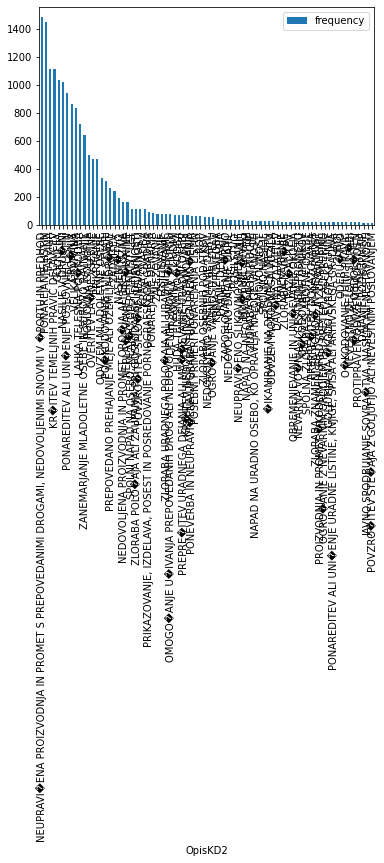

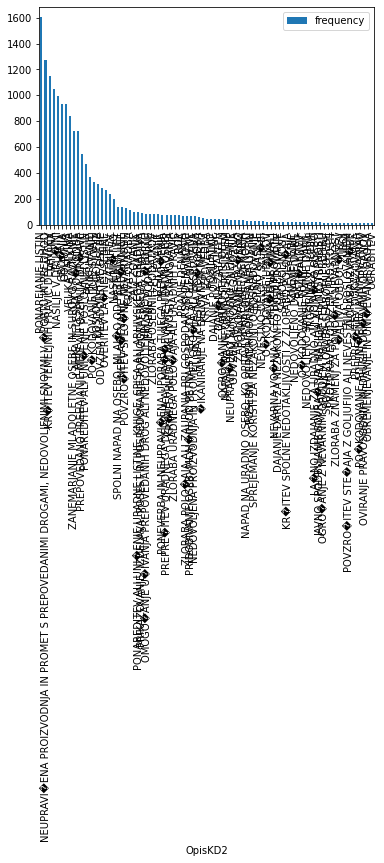

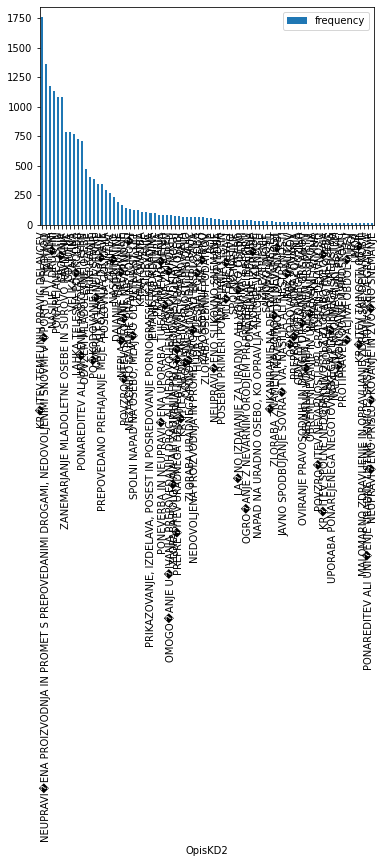

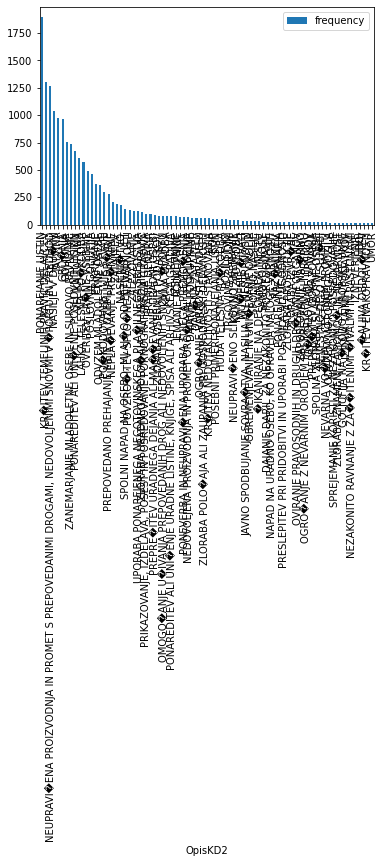

c:\Users\Irinej\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Irinej\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


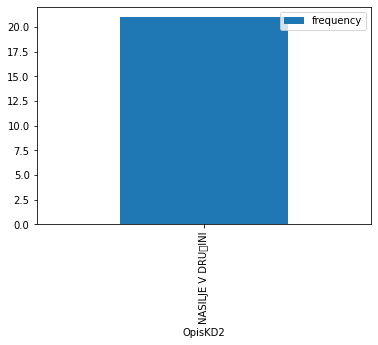

In [19]:
abovex = []
x = 10
for i in range(len(frequencysKD)):
    #pd.DataFrame(frequencysKD[i], columns=['OpisKD', 'frequency']['frequency']>x)
    temp_df = pd.DataFrame(frequencysKD[i], columns=['OpisKD2', 'frequency'])
    temp_df['frequency'] = temp_df['frequency'].astype(int)
    abovex.append(temp_df[temp_df['frequency'] > x])

for df in abovex:
    df.plot(x='OpisKD2', y='frequency', kind='bar')